In [1]:
import pandas as pd

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
df_train = pd.read_csv("../train_filled_new.csv")

In [4]:
df_test = pd.read_csv("../test_filled_new.csv")

In [5]:
df_withcounts = df_train

In [6]:
train = pd.read_csv('../train.csv')

In [7]:
df_withcounts['NumMosquitos'] = train['NumMosquitos']

In [8]:
#del df_withcounts['WnvPresent']

In [9]:
df_withcounts.to_csv('aggregated_train_with_nummosquitos.csv')

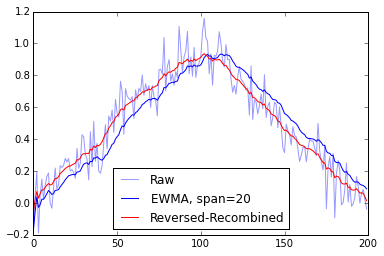

In [10]:
import matplotlib.pyplot as plt
import pandas, numpy as np
%matplotlib inline
ewma = pandas.stats.moments.ewma

# make a hat function, and add noise
x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 )
plt.plot( x, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( x, span=15 )          # take EWMA in fwd direction
bwd = ewma( x[::-1], span=15 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plt.plot( ewma( x, span=20 ), 'b', label='EWMA, span=20' )

# "corrected" (?) EWMA
plt.plot( c, 'r', label='Reversed-Recombined' )

plt.legend(loc=8)
plt.savefig( 'ewma_correction.png', fmt='png', dpi=100 )

In [11]:
[var for var in df_test.columns if var not in df_train.columns]

['Id']

In [12]:
[var for var in df_train.columns if var not in df_test.columns]

['NumMosquitos', 'WnvPresent']